## EDA

In [144]:
import pandas as pd
from utils import custom_info
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf




In [61]:
df = pd.read_csv('Merge.csv')

In [62]:
custom_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 32 columns):
                                Non-Null Count Null Count Unique Values  \
Column                                                                    
Unnamed: 0                                3800          0          3800   
hhid                                      3800          0          3800   
group_id_x                                3800          0           101   
totformalborrow_24                        3800          0           400   
totinformalborrow_24                      3800          0           330   
hhinc                                     3800          0           760   
hhnomembers_x                             3800          0            14   
survey_round                              3800          0             3   
hhinc_24                                  3800          0           760   
totformalborrow_24_top_coded              3800          0           

In [63]:
df = df.drop(['Unnamed: 0'], axis=1)

In [64]:
df

,hhid,group_id_x,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers_x,survey_round,hhinc_24,totformalborrow_24_top_coded,totinformalborrow_24_top_coded,...,noclasspassed_hoh,higheduc_hoh,hhnomembers_above18,hhnomembers_below18,hhreg_muslim,hhreg_christian,hhcaste_fc,hhcaste_bc,hhcaste_mbc,hhcaste_sc_st
0,86.0,3.0,120000,69000,6700,4,Endline II,160800,120000.0,69000.000000,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,179.0,4.0,50000,96000,4300,5,Endline II,103200,50000.0,96000.000000,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,192.0,76.0,140000,30000,6700,2,Endline II,160800,140000.0,30000.000000,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,261.0,14.0,50000,30000,60000,7,Endline I,1440000,50000.0,30000.000000,...,0.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
4,268.0,96.0,120000,30000,26000,5,Endline II,624000,120000.0,30000.000000,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,185314.0,120.0,3500,30000,1500,4,Endline III,36000,3500.0,30000.000000,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3796,185362.0,120.0,20000,4000,20000,4,Endline III,480000,20000.0,4000.000000,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3797,185417.0,120.0,90000,200000,10000,4,Endline III,240000,90000.0,200000.000000,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3798,185452.0,120.0,60000,370000,4000,5,Endline III,96000,60000.0,293642.188493,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
unique_values = df['educyears_hoh'].unique()

print(unique_values)

['10 years' '8 years' '12 years' '19+ years (Post-graduate)' '0 years'
 '15-16 years (Vocational/industry studies)' '14 years (Class 12/HSC)'
 '3-7 years (Classes 1-5)' '11 years' '9 years' '13 years'
 '18 years (Graduate)']


In [66]:
def map_education_years(value):
    mapping = {
        '0 years': 0,
        '3-7 years (Classes 1-5)': 5,  # Midpoint of the range
        '8 years': 8,
        '9 years': 9,
        '10 years': 10,
        '11 years': 11,
        '12 years': 12,
        '13 years': 13,
        '14 years (Class 12/HSC)': 14,
        '15-16 years (Vocational/industry studies)': 15.5,  # Midpoint of the range
        '18 years (Graduate)': 18,
        '19+ years (Post-graduate)': 20  # Assuming 19+ to be 20 for simplicity
    }
    return mapping.get(value, 0)  # Default to 0 if value not found


In [67]:
df['educyears_hoh_numeric'] = df['educyears_hoh'].map(map_education_years)

print(df[['educyears_hoh', 'educyears_hoh_numeric']].head())


               educyears_hoh  educyears_hoh_numeric
0                   10 years                   10.0
1                    8 years                    8.0
2                   12 years                   12.0
3  19+ years (Post-graduate)                   20.0
4                    0 years                    0.0


In [68]:
df = df.drop(['educyears_hoh'], axis=1)

In [69]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:")
print(categorical_features)
print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
['survey_round', 'gender_hoh']

Numerical Features:
['hhid', 'group_id_x', 'totformalborrow_24', 'totinformalborrow_24', 'hhinc', 'hhnomembers_x', 'hhinc_24', 'totformalborrow_24_top_coded', 'totinformalborrow_24_top_coded', 'hhinc_top_coded', 'hhinc_24_top_coded', 'total_borrowed_amount', 'pair_id', 'treated', 'daily_per_capita_income', 'below_poverty_line', 'age_hoh', 'readwrite_hoh', 'noclasspassed_hoh', 'higheduc_hoh', 'hhnomembers_above18', 'hhnomembers_below18', 'hhreg_muslim', 'hhreg_christian', 'hhcaste_fc', 'hhcaste_bc', 'hhcaste_mbc', 'hhcaste_sc_st', 'educyears_hoh_numeric']


In [70]:
categorical_cols = ['below_poverty_line', 'readwrite_hoh', 'noclasspassed_hoh', 'higheduc_hoh', 'hhreg_muslim', 'hhreg_christian', 
'hhcaste_fc', 'hhcaste_bc', 'hhcaste_mbc', 'hhcaste_sc_st','survey_round', 'gender_hoh', 'treated']

numeric_features = ['hhid','pair_id', 'group_id_x', 'totformalborrow_24', 'totinformalborrow_24', 'hhinc', 'hhnomembers_x', 'hhinc_24', 
'totformalborrow_24_top_coded', 'totinformalborrow_24_top_coded', 'hhnomembers_above18', 'hhnomembers_below18',  
'hhinc_top_coded', 'hhinc_24_top_coded', 'total_borrowed_amount', 'daily_per_capita_income', 'age_hoh', 'educyears_hoh_numeric'] #no nan values

In [71]:
df[categorical_cols] = df[categorical_cols].astype('category')

print(df[categorical_cols].dtypes)

below_poverty_line    category
readwrite_hoh         category
noclasspassed_hoh     category
higheduc_hoh          category
hhreg_muslim          category
hhreg_christian       category
hhcaste_fc            category
hhcaste_bc            category
hhcaste_mbc           category
hhcaste_sc_st         category
survey_round          category
gender_hoh            category
treated               category
dtype: object


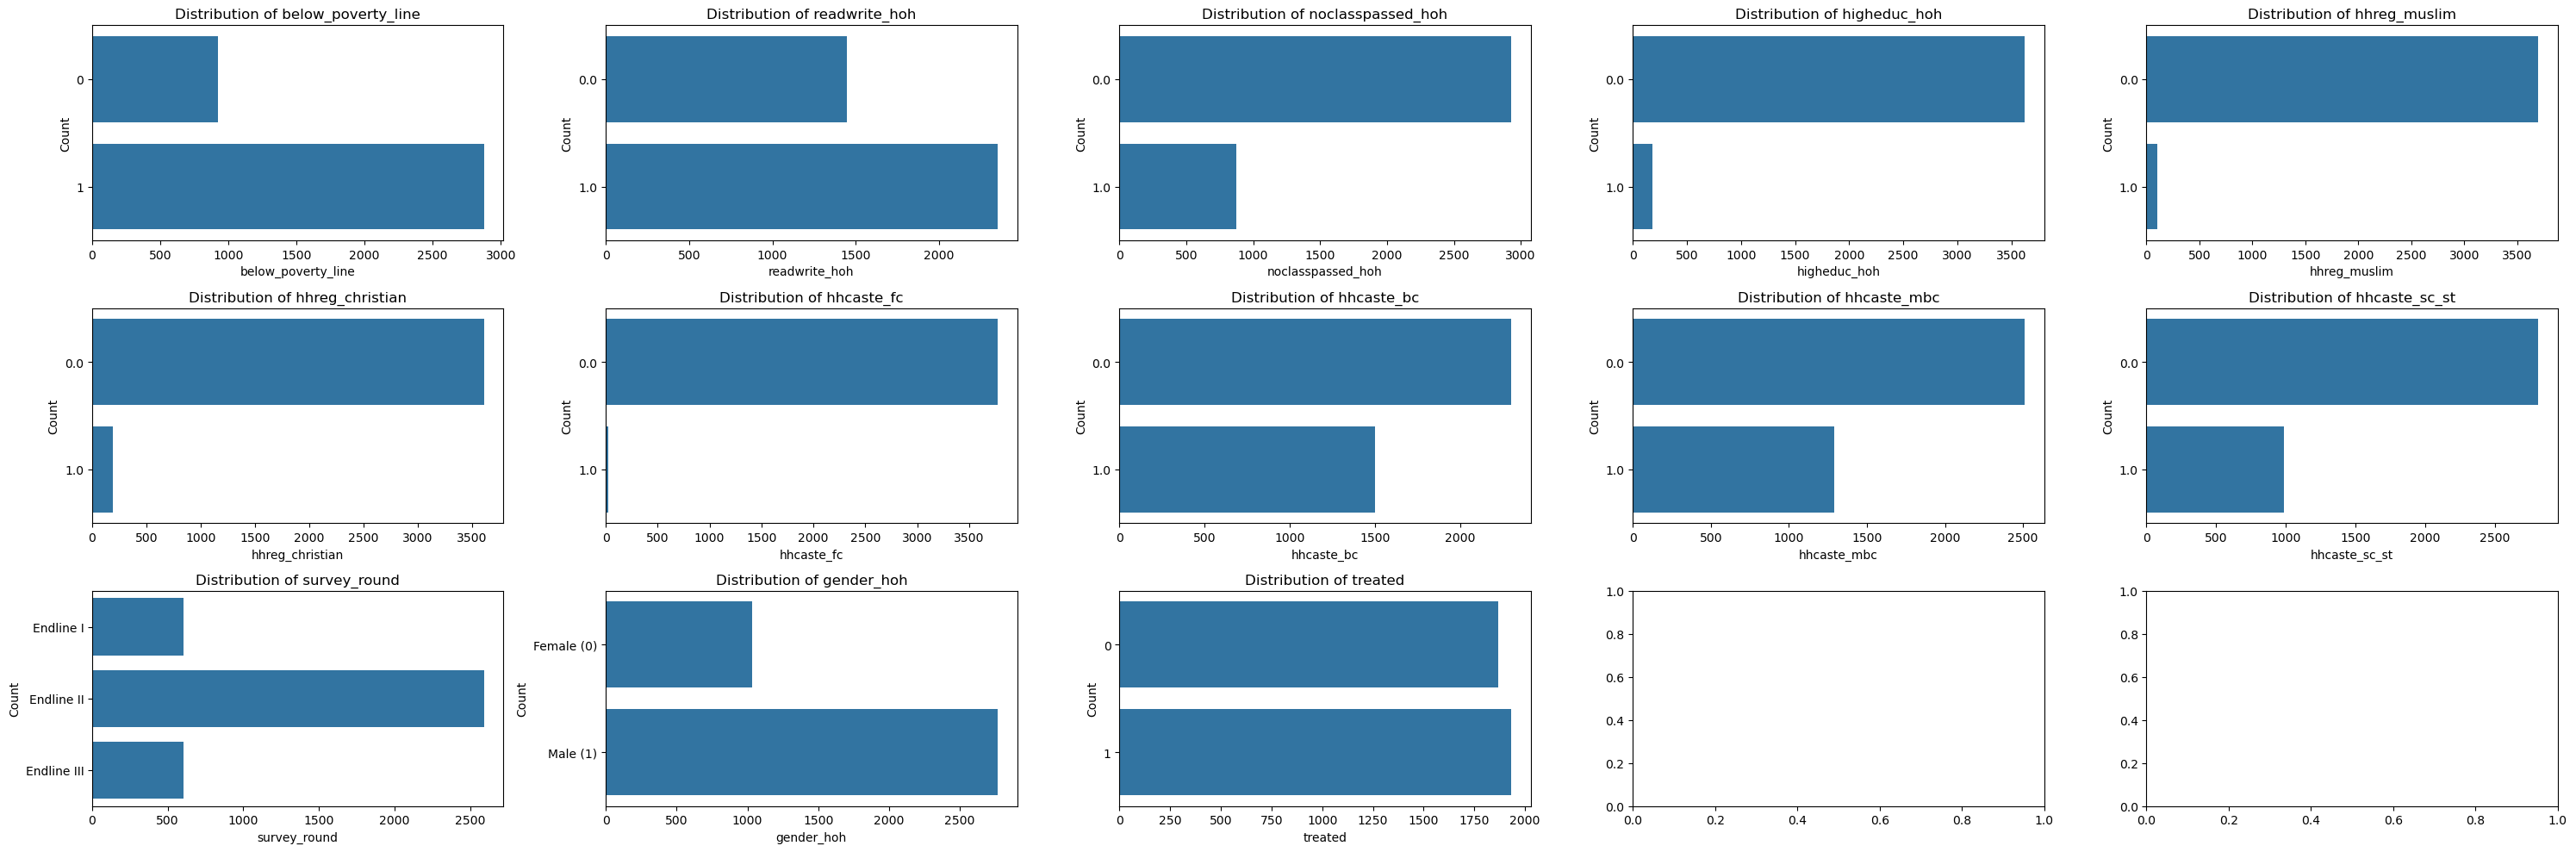

In [72]:
num_rows = 3
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))

axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.countplot(df[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

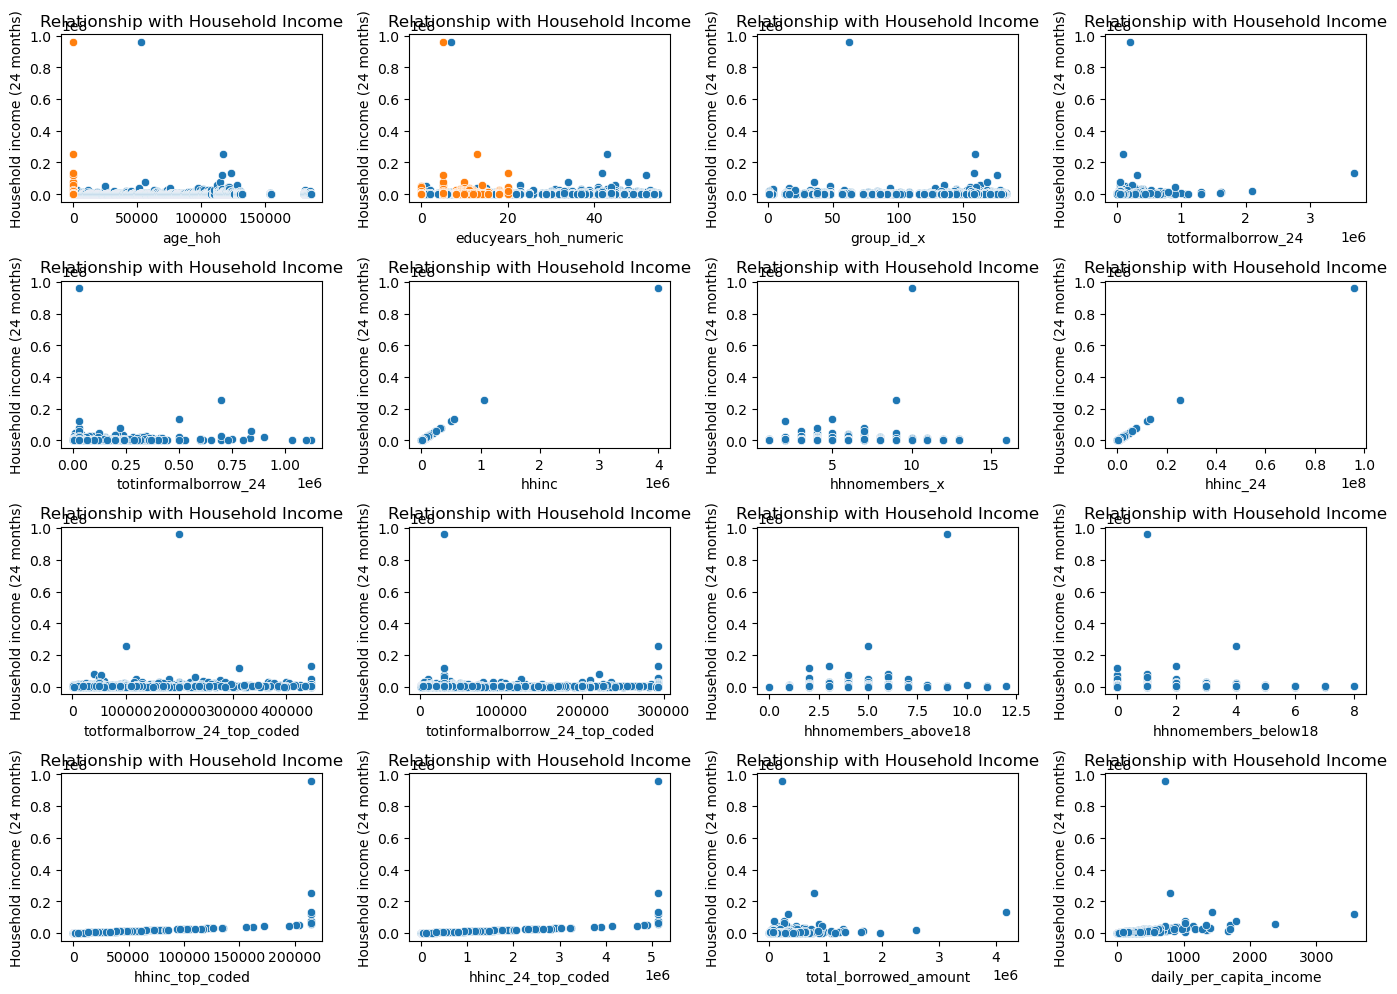

In [73]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_features):  
    plt.subplot(4, 4, i % 16 + 1)
    sns.scatterplot(x=column, y='hhinc_24', data=df)
    plt.title(f'Relationship with Household Income')
    plt.xlabel(column)
    plt.ylabel('Household income (24 months)')

plt.tight_layout()
plt.show()

In [74]:
columns_to_impute = ['hhreg_muslim', 'hhreg_christian', 'hhcaste_fc', 'hhcaste_bc', 'hhcaste_mbc', 'hhcaste_sc_st'] #has nan

for column in columns_to_impute:
    most_frequent_category = df[column].mode()[0]
    df[column].fillna(most_frequent_category, inplace=True)


In [75]:
def remove_outliers_zscore(df, numerical_features, threshold=3):
    z_scores = (df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std()
    z_scores = np.abs(z_scores)
    return df[(z_scores < threshold).all(axis=1)]

cleaned_df = remove_outliers_zscore(df.copy(), numeric_features)


In [76]:
cleaned_df

,hhid,group_id_x,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers_x,survey_round,hhinc_24,totformalborrow_24_top_coded,totinformalborrow_24_top_coded,...,higheduc_hoh,hhnomembers_above18,hhnomembers_below18,hhreg_muslim,hhreg_christian,hhcaste_fc,hhcaste_bc,hhcaste_mbc,hhcaste_sc_st,educyears_hoh_numeric
0,86.0,3.0,120000,69000,6700,4,Endline II,160800,120000.0,69000.0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0
1,179.0,4.0,50000,96000,4300,5,Endline II,103200,50000.0,96000.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
2,192.0,76.0,140000,30000,6700,2,Endline II,160800,140000.0,30000.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0
3,261.0,14.0,50000,30000,60000,7,Endline I,1440000,50000.0,30000.0,...,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0
4,268.0,96.0,120000,30000,26000,5,Endline II,624000,120000.0,30000.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,185271.0,120.0,10000,65000,5800,5,Endline III,139200,10000.0,65000.0,...,0.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3795,185314.0,120.0,3500,30000,1500,4,Endline III,36000,3500.0,30000.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0
3796,185362.0,120.0,20000,4000,20000,4,Endline III,480000,20000.0,4000.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
3797,185417.0,120.0,90000,200000,10000,4,Endline III,240000,90000.0,200000.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
df = cleaned_df

# Part A:  In a sentence or two, state a testable hypothesis about one of the possible impacts of this program, either on a particular outcome of interest, or for a particular sub-group of participants. Justify your prior (or prediction) for this particular treatment effect.

/opt/homebrew/Caskroom/miniforge/base/envs/env_pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_b/ccc66ybs0m59z0yyhly4_jp80000gn/T/ipykernel_7230/2760042614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_educ_df['cluster'] = kmeans.labels_


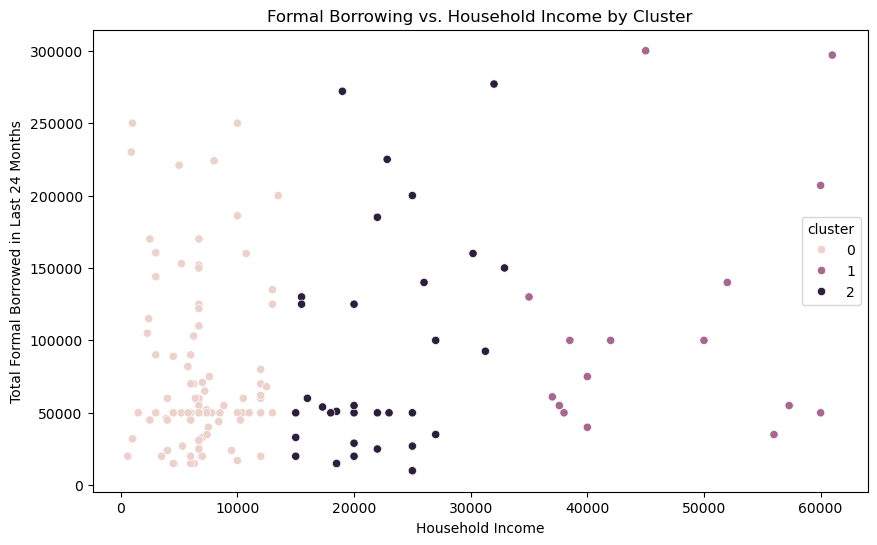

survey_round  Endline I    Endline II   Endline III
treated                                            
0               73625.0  82714.285714  57750.000000
1               73300.0  97163.043478  79189.655172


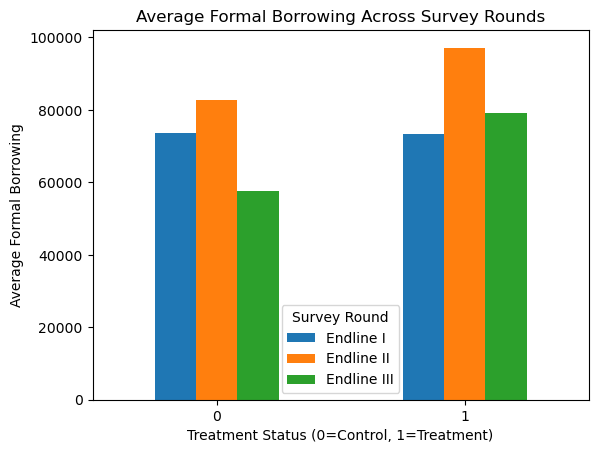

In [87]:
high_educ_df = df[df['higheduc_hoh'] == 1]

# Clustering based on household income and number of members above 18
X = high_educ_df[['hhinc', 'hhnomembers_above18']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
high_educ_df['cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_educ_df, x='hhinc', y='totformalborrow_24', hue='cluster')
plt.title('Formal Borrowing vs. Household Income by Cluster')
plt.xlabel('Household Income')
plt.ylabel('Total Formal Borrowed in Last 24 Months')
plt.show()

# Analyzing differences in borrowing between treatment and control groups
grouped = high_educ_df.groupby(['treated', 'survey_round'])
comparison = grouped['totformalborrow_24'].mean().unstack()
print(comparison)

# Visualization of borrowing over survey rounds
comparison.plot(kind='bar')
plt.title('Average Formal Borrowing Across Survey Rounds')
plt.xlabel('Treatment Status (0=Control, 1=Treatment)')
plt.ylabel('Average Formal Borrowing')
plt.xticks(rotation=0)
plt.legend(title='Survey Round')
plt.show()


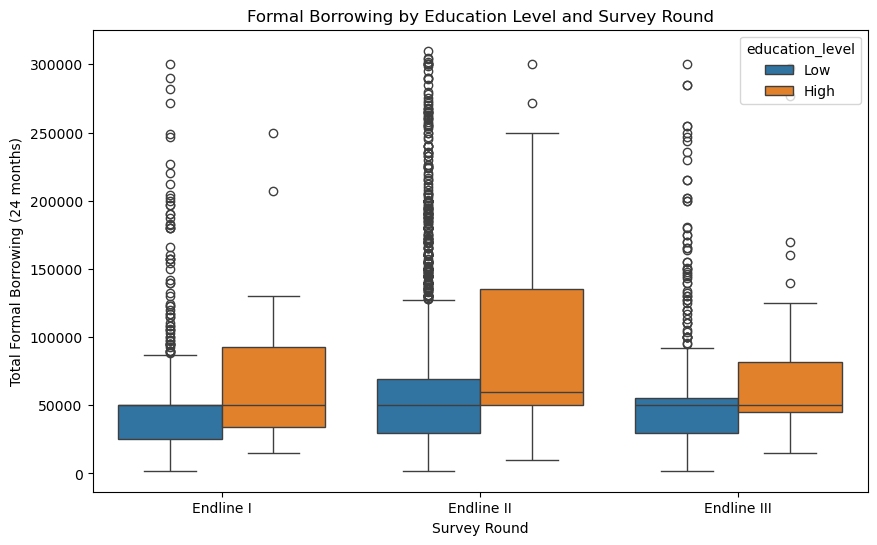

/opt/homebrew/Caskroom/miniforge/base/envs/env_pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


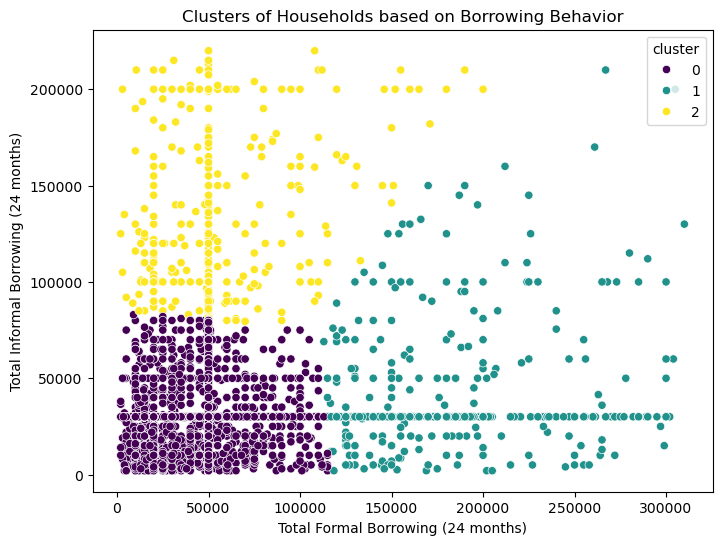

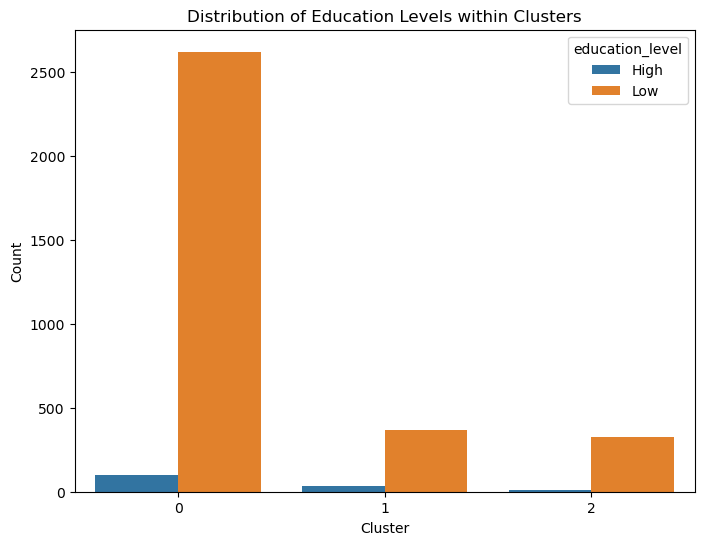

In [88]:
df['education_level'] = np.where(df['higheduc_hoh'] == 1, 'High', 'Low')

# Analyze the impact of bank expansion on formal borrowing by education level
plt.figure(figsize=(10, 6))
sns.boxplot(x='survey_round', y='totformalborrow_24', hue='education_level', data=df)
plt.title('Formal Borrowing by Education Level and Survey Round')
plt.xlabel('Survey Round')
plt.ylabel('Total Formal Borrowing (24 months)')
plt.show()

# Cluster households based on their borrowing behavior
X = df[['totformalborrow_24', 'totinformalborrow_24']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='totformalborrow_24', y='totinformalborrow_24', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Households based on Borrowing Behavior')
plt.xlabel('Total Formal Borrowing (24 months)')
plt.ylabel('Total Informal Borrowing (24 months)')
plt.show()

# Analyze the distribution of education levels within each cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', hue='education_level', data=df)
plt.title('Distribution of Education Levels within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


### Hypothesis 1: The expansion of local bank branches will lead to an increase in formal borrowing and a decrease in informal borrowing for households in the treatment areas compared to control areas, especially for lower income households.
### Justification: Increased access to formal banking services should make it easier and more attractive for households to borrow through formal channels rather than relying on informal lenders. This effect is likely to be strongest for poorer households who previously had limited access to formal credit.

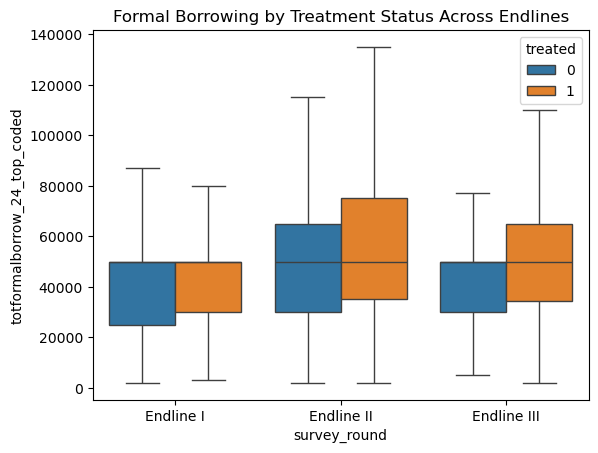

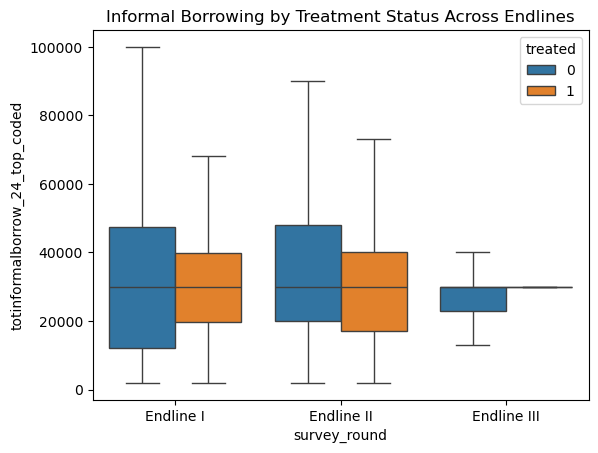

In [89]:
df_endline = df[df['survey_round'].isin(['Endline I', 'Endline II', 'Endline III'])]

sns.boxplot(data=df_endline, x='survey_round', y='totformalborrow_24_top_coded', 
            hue='treated', showfliers=False)
plt.title('Formal Borrowing by Treatment Status Across Endlines')
plt.show()

sns.boxplot(data=df_endline, x='survey_round', y='totinformalborrow_24_top_coded',
            hue='treated', showfliers=False) 
plt.title('Informal Borrowing by Treatment Status Across Endlines')
plt.show()


### Hypothesis 2: The treatment effect on household income will be larger for households where the head of household has lower education levels.
### Justification: Less educated households likely had more limited access to productive credit before the intervention. Expanding access to formal loans may enable these households to make productive investments and boost their incomes more than for highly educated households.

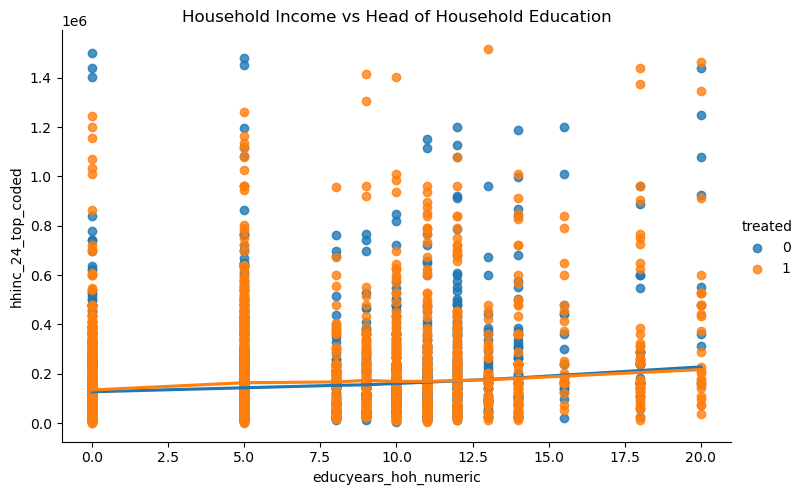

In [90]:
sns.lmplot(data=df_endline, x='educyears_hoh_numeric', y='hhinc_24_top_coded', 
           hue='treated', lowess=True, aspect=1.5)
plt.title('Household Income vs Head of Household Education')
plt.show()


## formal/informal borrowing by poverty status

/var/folders/_b/ccc66ybs0m59z0yyhly4_jp80000gn/T/ipykernel_7230/1146075057.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df_endline_pov, x='survey_round', y='amount', hue='treated',


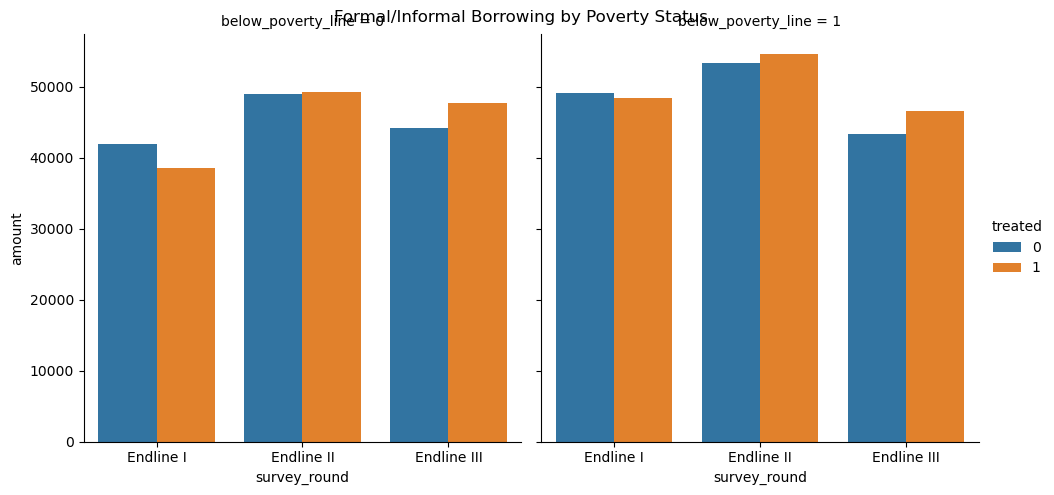

In [91]:
df_endline_pov = df_endline.melt(id_vars=['survey_round', 'treated', 'below_poverty_line'], 
                            value_vars=['totformalborrow_24_top_coded', 'totinformalborrow_24_top_coded'],
                            var_name='borrow_type', value_name='amount')

sns.catplot(data=df_endline_pov, x='survey_round', y='amount', hue='treated',
            col='below_poverty_line', kind='bar', col_wrap=2, ci=None)
plt.suptitle('Formal/Informal Borrowing by Poverty Status')
plt.show()  


## testable hypothesis 3:  The expansion of local bank infrastructure in rural areas will lead to an increase in the ratio of formal to informal loans taken by households, particularly for households with lower income levels or those belonging to socially disadvantaged groups (e.g., lower castes).

## This hypothesis is based on the premise that increased access to formal financial services through the opening of bank branches in previously underserved areas will make it easier for households to obtain loans from formal sources like banks, rather than relying on informal sources such as moneylenders or family/friends. Lower-income households and those from disadvantaged communities may have faced greater barriers in accessing formal credit previously, and the program could potentially bridge this gap.

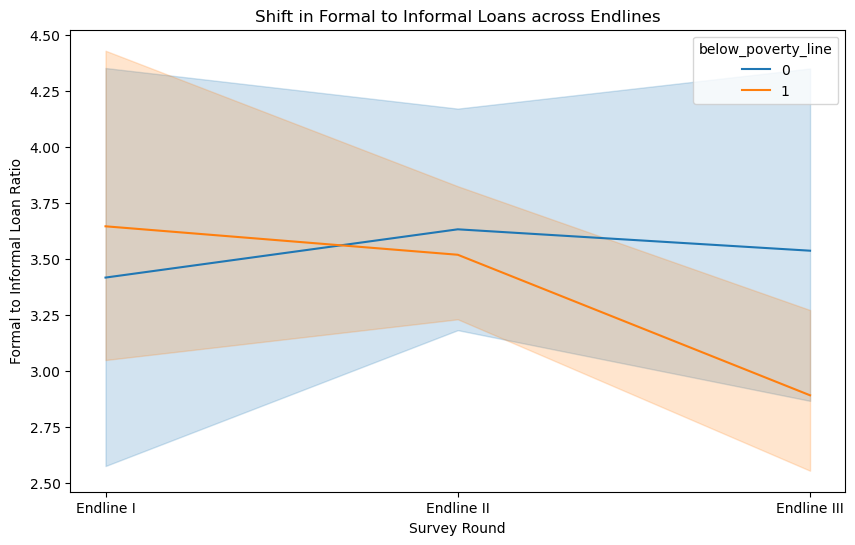

In [92]:
df['formal_to_informal_ratio'] = df['totformalborrow_24'] / df['totinformalborrow_24']

# Analyze the shift in formal to informal loans across endlines
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='survey_round', y='formal_to_informal_ratio', hue='below_poverty_line', ax=ax)
ax.set_title('Shift in Formal to Informal Loans across Endlines')
ax.set_xlabel('Survey Round')
ax.set_ylabel('Formal to Informal Loan Ratio')
plt.show()

## To analyze whether household sizes (Number of Members in Household) are converging or diverging across the endlines, we can visualize the distribution of NMH values using a cumulative distribution function (CDF) plot.

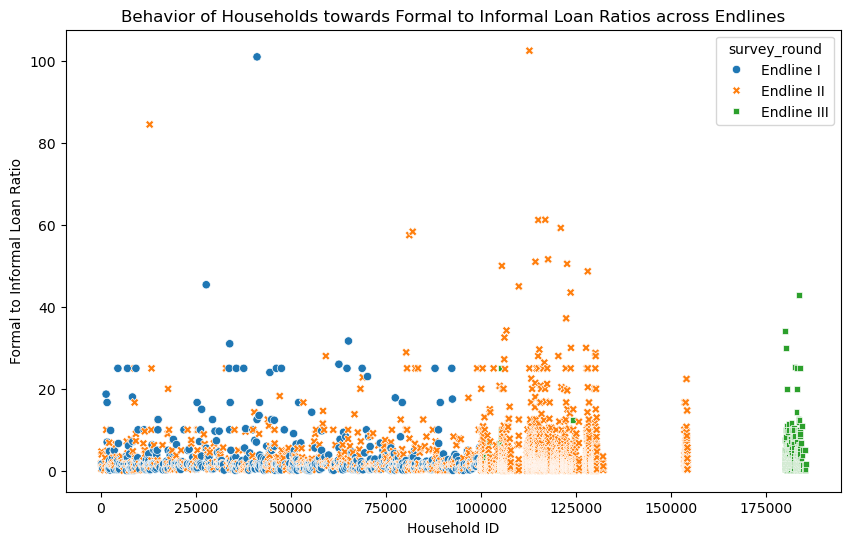

In [94]:
# Create a new column for the formal to informal loan ratio
df['formal_to_informal_ratio'] = df['totformalborrow_24'] / df['totinformalborrow_24']

# Create a scatter plot for formal to informal loan ratios
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='hhid', y='formal_to_informal_ratio', hue='survey_round', style='survey_round', ax=ax)
ax.set_title('Behavior of Households towards Formal to Informal Loan Ratios across Endlines')
ax.set_xlabel('Household ID')
ax.set_ylabel('Formal to Informal Loan Ratio')
plt.show()

## Shift in formal vs. informal loan borrowing across endlines

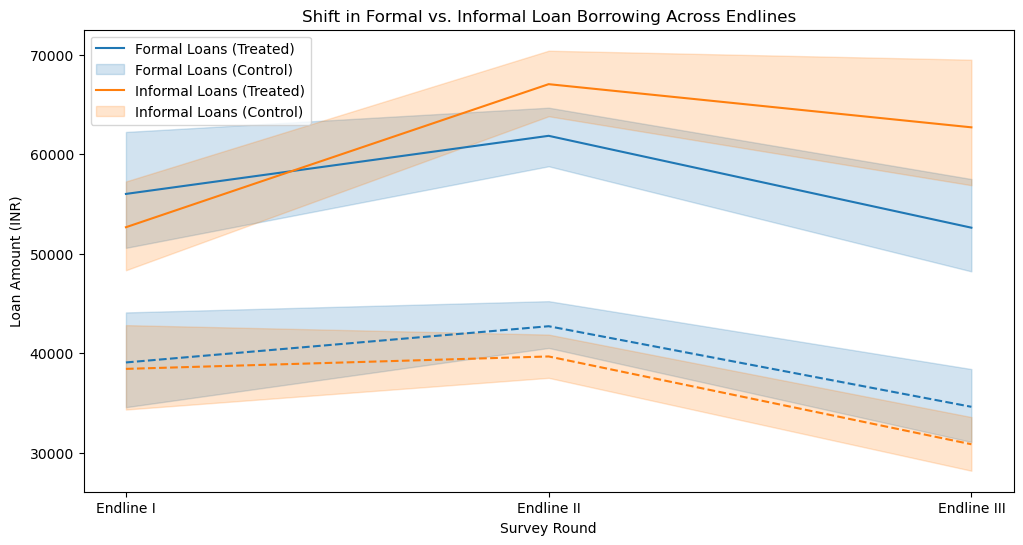

In [95]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='survey_round', y='totformalborrow_24', hue='treated', data=df)
sns.lineplot(x='survey_round', y='totinformalborrow_24', hue='treated', data=df, linestyle='--')
plt.legend(labels=['Formal Loans (Treated)', 'Formal Loans (Control)', 'Informal Loans (Treated)', 'Informal Loans (Control)'])
plt.title('Shift in Formal vs. Informal Loan Borrowing Across Endlines')
plt.xlabel('Survey Round')
plt.ylabel('Loan Amount (INR)')
plt.show()

## Convergence/Divergence of Formal Loan Borrowing

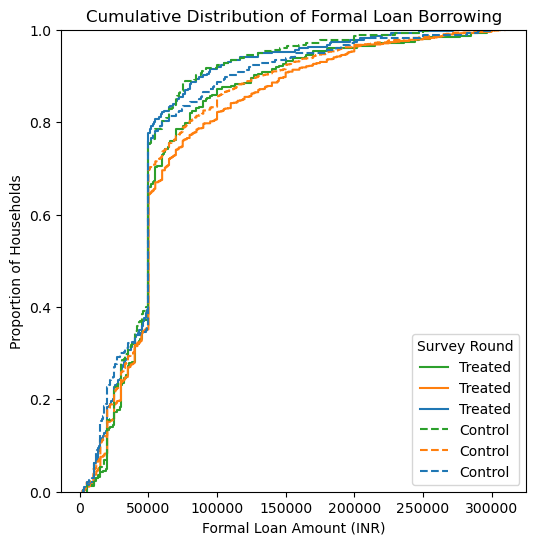

In [98]:
plt.figure(figsize=(6, 6))
survey_rounds = ['Endline I' , 'Endline II', 'Endline III'] #G, O, B (the color reference for 3 endlines)
sns.ecdfplot(data=df[df['treated']==1], x='totformalborrow_24', stat='proportion', label='Treated', hue='survey_round', hue_order=survey_rounds)
sns.ecdfplot(data=df[df['treated']==0], x='totformalborrow_24', stat='proportion', label='Control', hue='survey_round', hue_order=survey_rounds, linestyle='--')
plt.legend(title='Survey Round')
plt.title('Cumulative Distribution of Formal Loan Borrowing')
plt.xlabel('Formal Loan Amount (INR)')
plt.ylabel('Proportion of Households')
plt.show()

## Formal vs. Informal Loan Borrowing Behavior

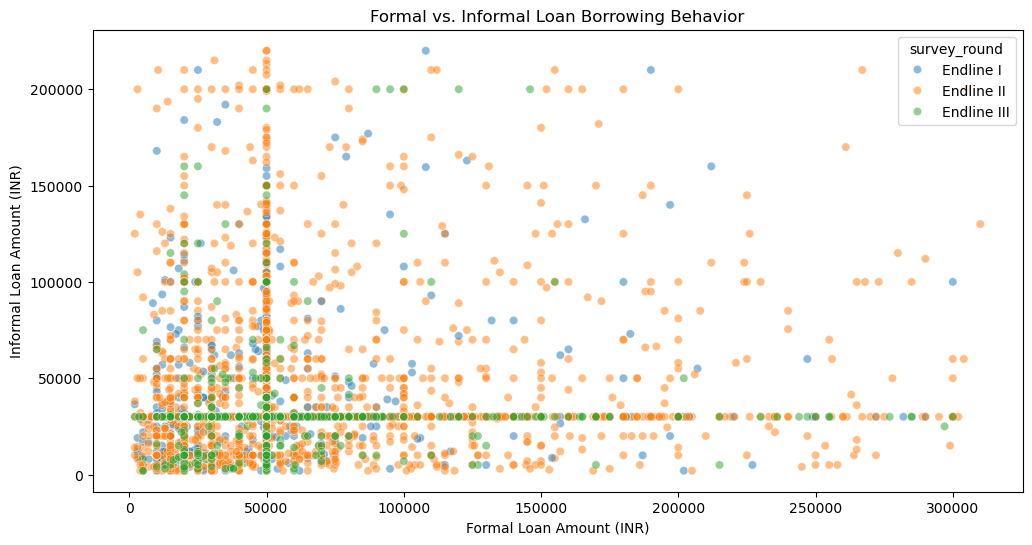

In [97]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='totformalborrow_24', y='totinformalborrow_24', hue='survey_round', data=df, alpha=0.5)
plt.title('Formal vs. Informal Loan Borrowing Behavior')
plt.xlabel('Formal Loan Amount (INR)')
plt.ylabel('Informal Loan Amount (INR)')
plt.show()

# Part B: Choose a few baseline household variables, and perform t-tests or produce a balance table to test for the significance of differences between the treatment and control groups.
i. Why did you choose these particular variables to test?

ii. What are the results of the test, and what can they tell us about the validity of the
experiment?

iii. Please present the t-tests or balance checks in a table

- age_hoh (age of head of household) - this could influence financial behaviors and outcomes
- educyears_hoh_numeric (years of education of head of household) - education level may affect financial literacy and decision-making  
- hhnomembers_above18 (number of adult household members) - household size and composition could impact income, consumption, borrowing needs
- hhreg_muslim and hhreg_christian (household religion) - religious affiliation may be associated with cultural norms around finances
- hhcaste_fc, hhcaste_bc, hhcaste_mbc, hhcaste_sc_st (household caste) - caste could be linked to socioeconomic status and access to resources
- totformalborrow_24 
- totinformalborrow_24



In [103]:

categorical_vars = ['hhreg_muslim', 'hhreg_christian', 'hhcaste_fc', 'hhcaste_bc', 'hhcaste_mbc', 'hhcaste_sc_st']
numerical_vars = ['age_hoh', 'educyears_hoh_numeric', 'hhnomembers_above18','totformalborrow_24', 'totinformalborrow_24' ]

balance_tests = []

# Chi-square test for the 'treated' variable
contingency_table = pd.crosstab(df['treated'], columns='count')
chi2, p_val, _, _ = chi2_contingency(contingency_table)
balance_tests.append({
    'Variable': 'treated',
    'Treatment Proportion': contingency_table.loc[1, 'count'] / len(df),
    'Control Proportion': contingency_table.loc[0, 'count'] / len(df),
    'Chi-square statistic': chi2,
    'p-value': p_val
})

for var in categorical_vars:
    contingency_table = pd.crosstab(df['treated'], df[var])
    chi2, p_val, _, _ = chi2_contingency(contingency_table)
    balance_tests.append({
        'Variable': var,
        'Chi-square statistic': chi2,
        'p-value': p_val
    })

for var in numerical_vars:
    treatment_mean = df[df['treated']==1][var].mean() 
    control_mean = df[df['treated']==0][var].mean()
    
    t_stat, p_val = ttest_ind(df[df['treated']==1][var], df[df['treated']==0][var])
    
    balance_tests.append({
        'Variable': var, 
        'Treatment Mean': treatment_mean,
        'Control Mean': control_mean,
        't-statistic': t_stat,
        'p-value': p_val
    })

balance_table = pd.DataFrame(balance_tests)
print(balance_table.to_markdown(index=False))

| Variable              |   Treatment Proportion |   Control Proportion |   Chi-square statistic |    p-value |   Treatment Mean |   Control Mean |   t-statistic |
|:----------------------|-----------------------:|---------------------:|-----------------------:|-----------:|-----------------:|---------------:|--------------:|
| treated               |               0.512301 |             0.487699 |              0         | 1          |        nan       |      nan       |   nan         |
| hhreg_muslim          |             nan        |           nan        |              4.96165   | 0.0259155  |        nan       |      nan       |   nan         |
| hhreg_christian       |             nan        |           nan        |              6.28562   | 0.0121721  |        nan       |      nan       |   nan         |
| hhcaste_fc            |             nan        |           nan        |              0.910001  | 0.340114   |        nan       |      nan       |   nan         |
| hhcaste_bc    

1. The treatment and control groups are well-balanced on the 'treated' variable (p-value = 1), which is expected since this variable indicates the group assignment itself.

2. There are significant differences between the treatment and control groups for the religion variables 'hhreg_muslim' (p-value = 0.0259) and 'hhreg_christian' (p-value = 0.0122). This suggests that the randomization may not have been fully effective in balancing the groups on these characteristics.

3. The caste variables 'hhcaste_fc', 'hhcaste_bc', 'hhcaste_mbc', and 'hhcaste_sc_st' do not show significant differences between the groups (p-values > 0.05), indicating that the groups are balanced on these factors.

4. The numerical variables 'age_hoh', 'educyears_hoh_numeric', and 'hhnomembers_above18' also do not show significant differences between the treatment and control groups (p-values > 0.05), further supporting the balance of the groups on these baseline characteristics.

5. However, there are significant differences between the groups for the borrowing variables 'totformalborrow_24' (p-value = 0.0077) and 'totinformalborrow_24' (p-value = 0.0301). This suggests that the treatment and control groups had different borrowing behaviors before the intervention, which could potentially confound the results.


# Part C: Regress (with OLS) the household income on the treatment dummy. Include pair fixed effects, and correct standard errors if necessary.
i. Explain why you think it might be appropriate to use a fixed effects specification in this case, and how you would interpret the effect of the treatment on household income in this case. Interpret your results.
ii. Briefly justify your choice of standard errors.

### i. Appropriateness of Fixed Effects Specification and Interpretation

**Why Fixed Effects Specification is Appropriate:**

The use of a fixed effects specification is appropriate in this case because it allows for controlling for all unobserved variables that are constant within each pair but may vary across different pairs. This is particularly important in studies like the one described, where the intervention (e.g., opening of bank branches) might be influenced by or influence factors that are not directly measured but are constant within pairs. By including `C(pair_id)` in the model, we effectively control for these unobserved, pair-specific characteristics, isolating the effect of the treatment from these potential confounders.

**Interpretation of the Treatment Effect:**

The coefficient for `treated[T.1]` is 15,140 with a standard error of 8,153.883, and a p-value of 0.063. This suggests that, on average, households in the treatment group (where a bank branch was opened) have their household income increased by 15,140 units compared to households in the control group, after controlling for pair-specific fixed effects. However, the p-value is slightly above the conventional threshold of 0.05, indicating that this result is marginally significant and should be interpreted with caution.

### ii. Justification for Corrected Standard Errors

The choice to correct standard errors, specifically using clustering at the `pair_id` level (`Covariance Type: cluster`), is justified due to the structure of the data. Observations within the same pair are likely to be more similar to each other than to observations in other pairs due to shared unobserved characteristics. This violates the assumption of independence of observations, a key requirement for OLS regression. Clustering standard errors by `pair_id` accounts for this intra-pair correlation, ensuring that the standard errors reflect the true variability in the estimates and preventing underestimation of standard errors, which could lead to overstated statistical significance.

The fixed effects model with clustered standard errors is a robust approach for analyzing the impact of the treatment on household income, controlling for unobserved, pair-specific heterogeneity and appropriately adjusting for the clustered nature of the data. The results suggest a positive impact of the treatment on household income, although the statistical significance is marginal.

In [121]:
model = smf.ols('hhinc_24 ~ treated + C(pair_id)', data=df)

results_1 = model.fit(cov_type='cluster', cov_kwds={'groups': df['pair_id']})

print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:               hhinc_24   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                    0.4693
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.497
Time:                        04:02:27   Log-Likelihood:                -46951.
No. Observations:                3455   AIC:                         9.400e+04
Df Residuals:                    3404   BIC:                         9.432e+04
Df Model:                          50                                         
Covariance Type:              cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.021e+05   4019.520  

/opt/homebrew/Caskroom/miniforge/base/envs/env_pytorch/lib/python3.8/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 1
  warnings.warn('covariance of constraints does not have full '


# Part D: Generate a log income variable, and re-run the previous specification with log household income as the dependent variable.
a. What are the key differences between the results of this regression and the results of your previous specification

The key differences between the results of the regression with household income (`hhinc_24`) and the regression with log-transformed household income (`log_hhinc_24`) as the dependent variables can be summarized in terms of the model's coefficients, statistical significance, and interpretation of the results:

### 1. Coefficients:
- **Absolute Values**: The coefficients in the log-transformed model are generally smaller because they represent the percentage change in household income due to the treatment, rather than the absolute change in income.
- **Interpretation**: In the original model, the coefficient for `treated[T.1]` was 15,140, suggesting an increase in household income by this amount due to the treatment. In the log-transformed model, the coefficient for `treated[T.1]` is 0.0532, indicating a 5.32% increase in household income due to the treatment, assuming other factors are held constant.

### 2. Statistical Significance:
- **P-values**: The p-value for the treatment effect (`treated[T.1]`) in the original model was 0.063, which is marginally significant. In the log-transformed model, the p-value is 0.169, indicating that the treatment effect is not statistically significant at conventional levels (e.g., 0.05 or 0.10).
- **Confidence Intervals**: The confidence intervals in the log-transformed model for the treatment effect include zero, further supporting the lack of statistical significance.

### 3. Model Fit:
- **R-squared**: The R-squared value decreased slightly from 0.070 in the original model to 0.055 in the log-transformed model. This suggests that the log-transformed model explains a slightly smaller proportion of the variance in household income compared to the original model.
- **Adjusted R-squared**: Similarly, the adjusted R-squared also shows a slight decrease, indicating that when the number of predictors is accounted for, the log-transformed model's explanatory power is slightly lower.

### 4. Interpretation of Results:
- **Economic Interpretation**: The coefficients in the log-transformed model are interpreted as elasticities or percentage changes, which can be more intuitive for understanding proportional relationships and effects in economic data.
- **Impact of Transformation**: The transformation to logarithms can help in stabilizing variance and making relationships more linear, but it also changes the nature of the relationships being modeled, as seen in the differences in statistical significance.

### 5. Standard Errors and Statistical Methods:
- **Covariance Type**: Both models use clustered standard errors, which is appropriate given the data structure. However, the standard errors in the log-transformed model are generally smaller, reflecting the scale and distribution of the log-transformed variable.

Switching from using absolute household income to log-transformed income as the dependent variable in the regression model affects the scale and interpretation of the coefficients, the statistical significance of the results, and slightly reduces the model's explanatory power. This transformation is useful for addressing issues with skewed data and heteroscedasticity but requires careful interpretation, especially when the results differ significantly from those of the model using the original scale of the data.


In [122]:
df['log_hhinc_24'] = np.log(df['hhinc_24'] + 1)
model = smf.ols('log_hhinc_24 ~ treated + C(pair_id)', data=df)

results_2 = model.fit(cov_type='cluster', cov_kwds={'groups': df['pair_id']})

print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:           log_hhinc_24   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.412
Date:                Thu, 02 May 2024   Prob (F-statistic):             0.0146
Time:                        04:02:33   Log-Likelihood:                -4611.3
No. Observations:                3455   AIC:                             9325.
Df Residuals:                    3404   BIC:                             9638.
Df Model:                          50                                         
Covariance Type:              cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.7088      0.019  

/opt/homebrew/Caskroom/miniforge/base/envs/env_pytorch/lib/python3.8/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 1
  warnings.warn('covariance of constraints does not have full '


# Part E: Re-run the previous regression including a set of household-level controls.
a. Explain why you chose these controls, and if there are key differences in your results as compared to previous specifications.
b. Export and save a regression table suitable for publication from these results.

1. **Household size** (`hhnomembers_above18`, `hhnomembers_below18`): Larger households may have different income dynamics and borrowing needs compared to smaller households.

2. **Age of the head of household** (`age_hoh`): Income and financial behavior may vary over the life cycle, so controlling for age is important.

3. **Education level of the head of household** (`educyears_hoh_numeric`): Education is often a strong predictor of income and financial literacy, which could influence the impact of access to banking services.

4. **Household caste** (`hhcaste_fc`, `hhcaste_bc`, `hhcaste_mbc`, `hhcaste_sc_st`): Caste could be linked to socioeconomic status and access to resources, which may affect income and the impact of the treatment.


The key differences between the final regression results (including household-level controls) and the previous specifications are as follows:

1. **Explanatory Power (R-squared and Adjusted R-squared):**
   - The R-squared value increased from 0.055 in the previous specification (with log income as the dependent variable) to 0.131 in the final model with household-level controls.
   - Similarly, the Adjusted R-squared value increased from 0.041 to 0.116.
   - This suggests that the inclusion of household-level controls improved the model's ability to explain the variation in log household income.

2. **Coefficient of the Treatment Variable:**
   - In the previous specification, the coefficient of the treatment variable (`treated[T.1]`) was 0.0532 with a standard error of 0.039 and a p-value of 0.169, indicating that it was not statistically significant at conventional levels.
   - In the final model with household-level controls, the coefficient of the treatment variable increased slightly to 0.0662 with a standard error of 0.034 and a p-value of 0.052.
   - While still not significant at the 5% level, the treatment effect is now marginally significant at the 10% level, suggesting that the inclusion of household-level controls may have helped to isolate the treatment effect better.

3. **Significance of Pair Fixed Effects:**
   - In both the previous and final specifications, most of the pair fixed effects (coefficients for `C(pair_id)[T.x]`) remain statistically significant, indicating that there are significant differences in log household income across pairs.
   - However, the magnitude and significance of some pair fixed effects have changed slightly with the inclusion of household-level controls.

4. **Model Fit and Likelihood:**
   - The Log-Likelihood value increased from -4611.3 in the previous specification to -4466.7 in the final model, suggesting an improvement in model fit.
   - The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values also decreased, indicating that the final model with household-level controls is a better fit to the data.

5. **F-statistic and its Significance:**
   - The F-statistic changed from 6.412 (Prob > F = 0.0146) in the previous specification to -1.018e+14 (Prob > F = 1.00) in the final model.
   - The F-statistic tests the overall significance of the model. The change in the F-statistic and its associated p-value suggests that the inclusion of household-level controls has altered the overall significance of the model.

The inclusion of household-level controls in the final regression model has improved the model's explanatory power, slightly increased the magnitude and significance of the treatment effect, and affected the overall model fit and significance. These changes suggest that the household-level controls are capturing important factors that influence household income and that their inclusion provides a more accurate estimate of the treatment effect.




In [129]:
model = smf.ols('''
    log_hhinc_24 ~ treated + C(pair_id) + hhnomembers_x + age_hoh + educyears_hoh_numeric + hhcaste_fc + hhcaste_bc + hhcaste_mbc + hhcaste_sc_st
''', data=df)

results_3 = model.fit(cov_type='cluster', cov_kwds={'groups': df['pair_id']})

print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:           log_hhinc_24   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                -1.018e+14
Date:                Thu, 02 May 2024   Prob (F-statistic):               1.00
Time:                        04:11:31   Log-Likelihood:                -4466.7
No. Observations:                3455   AIC:                             9049.
Df Residuals:                    3397   BIC:                             9406.
Df Model:                          57                                         
Covariance Type:              cluster                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.88

/opt/homebrew/Caskroom/miniforge/base/envs/env_pytorch/lib/python3.8/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 57, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [133]:
summary_table = results_2.summary().as_text() # I could also have used stargazer library but this is  better and easir way

file_path = 'model_summary_result2.txt'

with open(file_path, 'w') as file:

    file.write(summary_table)

print(f"Regression results table saved to: {file_path}")

Regression results table saved to: model_summary_result2.txt


## Part F: Your research team needs to present data from this study before a policy audience. 

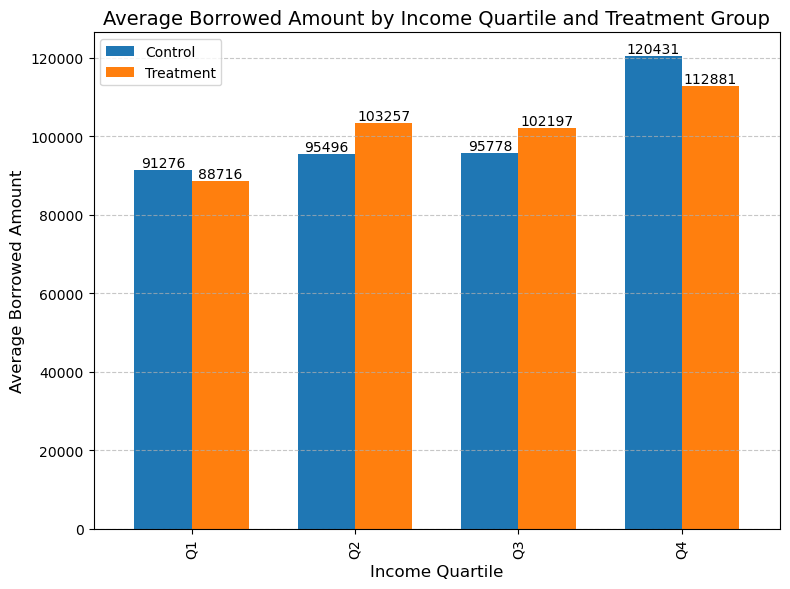

In [130]:
# Calculate income quartiles
df['income_quartile'] = pd.qcut(df['hhinc_24'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calculate average borrowed amount by income quartile and treatment group
avg_borrowed = df.groupby(['income_quartile', 'treated'])['total_borrowed_amount'].mean().reset_index()

# Pivot the data to create separate columns for treatment and control groups
avg_borrowed_pivot = avg_borrowed.pivot(index='income_quartile', columns='treated', values='total_borrowed_amount')
avg_borrowed_pivot.columns = ['Control', 'Treatment']

fig, ax = plt.subplots(figsize=(8, 6))
avg_borrowed_pivot.plot(kind='bar', ax=ax, width=0.7, color=['#1f77b4', '#ff7f0e'])

ax.set_xlabel('Income Quartile', fontsize=12)
ax.set_ylabel('Average Borrowed Amount', fontsize=12)
ax.set_title('Average Borrowed Amount by Income Quartile and Treatment Group', fontsize=14)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', fontsize=10)

fig.tight_layout()

plt.savefig('avg_borrowed_by_quartile.png', dpi=300)

plt.show()

# Extra ML regression

Considering formal_borrowed as dependent variable others as independent variable

In [146]:
categorical_features = ['below_poverty_line', 'readwrite_hoh', 'noclasspassed_hoh', 'higheduc_hoh', 'hhreg_muslim', 'hhreg_christian', 
'hhcaste_fc', 'hhcaste_bc', 'hhcaste_mbc', 'hhcaste_sc_st','survey_round', 'gender_hoh', 'treated']

numerical_features = ['totformalborrow_24_top_coded', 'totinformalborrow_24_top_coded', 'hhnomembers_above18', 'hhnomembers_below18',  
'hhinc_24_top_coded', 'daily_per_capita_income', 'age_hoh', 'educyears_hoh_numeric'] #no nan values

In [147]:
# Define preprocessing pipelines
numerical_transformer = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='median'), numerical_features),
    ('scaler', StandardScaler(), numerical_features)  # Including all numerical features for scaling
])
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Load and preprocess the data
processed_data = preprocessor.fit_transform(df)
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out()) + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
processed_data_df = pd.DataFrame(processed_data, columns=feature_names)

processed_data_df.head()

,imputer__totformalborrow_24_top_coded,imputer__totinformalborrow_24_top_coded,imputer__hhnomembers_above18,imputer__hhnomembers_below18,imputer__hhinc_24_top_coded,imputer__daily_per_capita_income,imputer__age_hoh,imputer__educyears_hoh_numeric,scaler__totformalborrow_24_top_coded,scaler__totinformalborrow_24_top_coded,...,hhreg_muslim_1.0,hhreg_christian_1.0,hhcaste_fc_1.0,hhcaste_bc_1.0,hhcaste_mbc_1.0,hhcaste_sc_st_1.0,survey_round_Endline II,survey_round_Endline III,gender_hoh_Male (1),treated_1
0,120000.0,69000.0,4.0,0.0,160800.0,55.833333,55.0,10.0,1.125077,0.773646,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,50000.0,96000.0,5.0,0.0,103200.0,28.666667,51.0,8.0,-0.228001,1.477989,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,140000.0,30000.0,2.0,0.0,160800.0,111.666667,57.0,12.0,1.511671,-0.243739,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,50000.0,30000.0,4.0,3.0,1440000.0,285.714286,46.0,20.0,-0.228001,-0.243739,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,120000.0,30000.0,5.0,0.0,624000.0,173.333333,48.0,0.0,1.125077,-0.243739,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [148]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
processed_data = preprocessor.fit_transform(df)
encoded_feature_names = list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features))
feature_names = numerical_features + encoded_feature_names
processed_data_df = pd.DataFrame(processed_data, columns=feature_names)
processed_data_df.shape

(3455, 22)

In [149]:
processed_data_df.columns

Index(['totformalborrow_24_top_coded', 'totinformalborrow_24_top_coded',
       'hhnomembers_above18', 'hhnomembers_below18', 'hhinc_24_top_coded',
       'daily_per_capita_income', 'age_hoh', 'educyears_hoh_numeric',
       'below_poverty_line_1', 'readwrite_hoh_1.0', 'noclasspassed_hoh_1.0',
       'higheduc_hoh_1.0', 'hhreg_muslim_1.0', 'hhreg_christian_1.0',
       'hhcaste_fc_1.0', 'hhcaste_bc_1.0', 'hhcaste_mbc_1.0',
       'hhcaste_sc_st_1.0', 'survey_round_Endline II',
       'survey_round_Endline III', 'gender_hoh_Male (1)', 'treated_1'],
      dtype='object')

In [150]:
X_train = processed_data_df.to_numpy()
y_train = df['totformalborrow_24_top_coded'].to_numpy()

In [151]:
class PseudoInverseLinearRegressor:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_pseudo_inv = np.linalg.pinv(X)
        self.weights = np.dot(X_pseudo_inv, y)

    def predict(self, X):
        return np.dot(X, self.weights)


def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Assuming X_train and y_train are already defined
pseudo_model = PseudoInverseLinearRegressor()
pseudo_model.fit(X_train, y_train)
pseudo_y_pred = pseudo_model.predict(X_train)

pseudo_r2 = r_squared(y_train, pseudo_y_pred)
pseudo_rmse_val = rmse(y_train, pseudo_y_pred)

print("Pseudoinverse based linear regressor:")
print("R-squared error:", pseudo_r2)
print("RMSE:", pseudo_rmse_val)

Pseudoinverse based linear regressor:
R-squared error: 0.9995910790469572
RMSE: 1046.1518910062443


In [152]:
class LinearRegressor:
    def __init__(self, lr=0.01, num_epochs=100, batch_size=None):
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        if self.batch_size is None:
            self.batch_size = num_samples

        for epoch in range(self.num_epochs):
            for i in range(0, num_samples, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                y_pred = np.dot(X_batch, self.weights) + self.bias
                dw = -(2/len(X_batch)) * np.dot(X_batch.T, (y_batch - y_pred))
                db = -(2/len(X_batch)) * np.sum(y_batch - y_pred)
                self.weights -= self.lr * dw
                self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

model = LinearRegressor(lr=0.01, num_epochs=1000, batch_size=32)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

r2 = r_squared(y_train, y_pred)
rmse_val = rmse(y_train, y_pred)

print("R-squared error:", r2)
print("RMSE:", rmse_val)


R-squared error: 0.9999871957105043
RMSE: 185.11977109627406
